# 9.3 非線形最小二乗法を使った、データへの関数あてはめ
　ここでは、数値最適化の応用である**非線形最小二乗法**による曲線のフィッティングを行う。目的は、与えられたデータポイントに対して、いくつかのパラメータに依存した関数を当てはめること。線形最小二乗法とは対照的に、関数が線形である必要はない。

　人工的に生成したデータに対して、この手法を行っていく。

## 手順
　まず必要なライブラリをインポートする。

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

### 与えられた関数からランダムデータ点の生成
1. 次の、4つのパラメータを持つロジスティック関数を定義する。
$$f_{a,b,c,d}(x) = \frac{a}{1 + exp(-c(x-d))} + b$$

In [2]:
def f(x, a, b, c, d):
    return a/(1+ np.exp(-c * np.exp(-c * (x-d)))) + b # ロジスティック関数

2. 4つのパラメータをランダムに設定

In [4]:
a, c = np.random.exponential(size=2) # データ数2のexp乱数
b, d = np.random.randn(2) # 線形乱数

3. 実際のデータポイントを生成。またノイズを乗せておく。

In [7]:
n = 100 # データ数
x = np.linspace(-10., 10., n) # -10<x<10の範囲でn個の等間隔なx値配列
y_model = f(x, a, b, c, d) # 乱数パラメータよりデータポイントを生成
y = y_model + a * .2 * np.random.randn(n) # ノイズを乗せる

4. データポイントをプロットし、さらに定義の関数も黒点線で描画する。

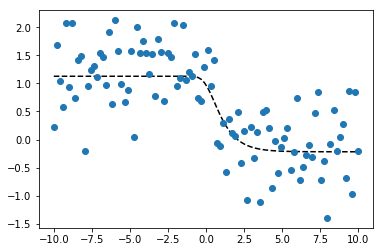

In [8]:
plt.plot(x, y_model, '--k') # 定義関数の描画
plt.plot(x, y, 'o') # 生成データポイントのプロット

### 曲線のフィッティング
1. 関数は未知で、データポイントが実験的に得られたものを考える。S字曲線だと推測して、それに当てはめる(曲線のフィッティング)。

In [9]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y, (a, b, c, d)) # フィッティング

2. S字曲線を、前のグラフに加えて描画してみる。

In [10]:
y_fit = f(x, a_, b_, c_, d_)

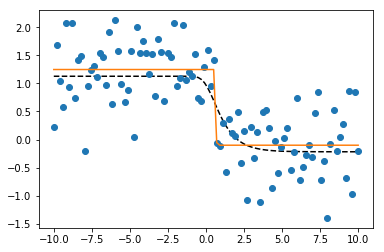

In [12]:
plt.plot(x, y_model, '--k') # 元の関数を点線で描画
plt.plot(x, y, 'o') # データ点をプロット
plt.plot(x, y_fit, '-') # 曲線フィッティングを線で描画